In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

In [350]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [251]:
df.shape

(8425, 23)

This dataset contains 23 features and 8425 records.

Let's check for nulls in the dataset.

In [324]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [253]:
df['MinTemp'].mean()

13.193305389221573

In [351]:
df['MinTemp']=df['MinTemp'].fillna(df['MinTemp'].mean())

df['MaxTemp']=df['MaxTemp'].fillna(df['MaxTemp'].mean())

In [352]:
df['Evaporation'].unique()

array([  nan,   8.6,   3.8,   2.8,   3.2,   6.8,   4.2,   1.6,   4.4,
         4. ,   2.2,   3.4,   6.4,   4.6,   3.6,   4.8,   3. ,   1.2,
         1.4,   2.6,   1. ,   2. ,   8.4,   2.4,   0.6,   5.4,   1.8,
         7. ,   0.8,   0.2,   5.2,   5. ,   6. ,   7.6,   5.8,   5.6,
         8. ,   6.2,   6.6,   7.8,   8.8,   7.4,   9.4,   7.2,   0.4,
         0. ,  18. ,  24.2,  14.6,  19.4,  10.8,  28. ,  11.8,  24.6,
        11.2,  22.6,  10. ,  37. ,  26. ,  11. ,  19.8,  24.4,  10.6,
        27.4,  12. ,  11.6,  24. ,   9. ,  23. ,  29.2,  20.6,  13.2,
        22.8,   9.8,  16. ,  20. ,  10.4,   9.6,  12.2,  15.4,  18.4,
        24.8,  20.8,  32. ,  55.4,  17.8,  16.2,  14.2,  59.2,  33.8,
        10.2, 145. ,  16.6,  47. ,  15.2,  15.8,  12.6,  11.4,   9.2,
        14.8,  13. ,   8.2,  13.6,  12.8,  12.4,  17.6,  19.2,  13.8,
        22.4,  18.6,  13.4,  17. ,  14. ,  14.4,  15. ,  15.6,   0.7])

In [353]:
df['Evaporation']=df['Evaporation'].fillna(df['Evaporation'].mean())

In [354]:
df['Sunshine'].unique()

array([ nan,  9. ,  3.4,  6.1, 11. ,  7.1,  2.8,  6.7,  6.4,  6. ,  9.4,
        6.3, 11.1, 11.2, 11.4,  9.7,  7.9,  0.3,  0. ,  0.5,  3.5,  1.9,
        1.1,  7.8,  8.8,  1.8,  6.6,  3.1,  3. , 10.4, 10.5,  9.9,  9.5,
        1. ,  4.3,  9.2,  9.8,  4.8,  8.9,  4.5,  2.6, 10. , 10.2,  9.1,
        2.2,  0.4,  0.7,  0.2,  2.7,  8.5,  3.6,  2.5,  6.9,  8.2,  6.8,
        7.2,  9.6,  5.1,  5.8,  1.6,  0.6,  7.7,  8.3,  2.9,  8.4,  4.2,
        9.3,  4.7,  4.1,  5.3,  7.4,  7.3,  2.4, 10.6, 10.3, 10.1,  2.3,
       10.7,  8.6,  5.2, 10.9, 10.8,  8. ,  1.5,  8.7, 11.3, 11.5,  5.7,
       11.9,  3.3, 12.1, 12.4,  7. ,  4. , 11.7, 12.7, 12.5, 12.6, 13. ,
        5.5, 12.2, 11.6, 12.9, 13.1,  5.4,  3.7, 12. ,  2. ,  8.1, 13.2,
       13.6, 12.3, 11.8,  7.5,  6.2,  1.2,  3.8,  1.4,  5. ,  0.8,  4.4,
        6.5,  0.1,  4.9,  3.9,  4.6,  0.9,  5.9,  7.6,  1.3, 12.8, 13.4,
        1.7, 13.3,  3.2,  2.1, 13.5, 13.8, 13.9, 13.7,  5.6])

In [355]:
df['Sunshine']=df['Sunshine'].fillna(df['Sunshine'].mean())

In [356]:
df['WindGustDir'].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', nan, 'ENE',
       'SSE', 'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

In [357]:
df['WindGustDir'].mode()

0    N
Name: WindGustDir, dtype: object

In [358]:
df['WindGustDir']=df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])

In [359]:
df['WindGustSpeed'].unique()

array([ 44.,  46.,  24.,  41.,  56.,  50.,  35.,  80.,  28.,  30.,  31.,
        61.,  nan,  22.,  63.,  43.,  26.,  33.,  57.,  48.,  39.,  37.,
        52.,  98.,  54.,  83.,  59.,  70.,  69.,  17.,  20.,  19.,  15.,
        13.,  11.,  72.,  85.,  65.,  78., 107.,  74.,  67.,  94.,  76.,
        81.,  87.,   9.,  93.,   7.,  91.,  89., 102., 100.])

In [360]:
df['WindGustSpeed']=df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean())

In [361]:
df['WindDir9am'].unique()

array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', nan, 'SSW', 'N',
       'WSW', 'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

In [362]:
df['WindDir9am']=df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])

In [363]:
df['WindDir3pm'].unique()

array(['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
       'SW', 'SE', 'N', 'S', 'NNE', nan, 'NE'], dtype=object)

In [364]:
df['WindDir3pm']=df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])

In [365]:
df['WindSpeed9am'].unique()

array([20.,  4., 19., 11.,  7.,  6., 15., 17., 28., 24., nan,  9.,  0.,
       13.,  2., 26., 30., 22., 35., 37., 31., 33., 43., 41., 46., 39.,
       56., 54., 50., 52., 44., 61., 57., 48., 63.])

In [366]:
df['WindSpeed9am'].mean()

13.847646424721523

In [367]:
df['WindSpeed9am']=df['WindSpeed9am'].fillna(df['WindSpeed9am'].mean())

In [368]:
df['WindSpeed3pm'].unique()

array([24., 22., 26.,  9., 20., 17., 28., 11.,  6., 13., 30., 19., 31.,
        7., 15., 48.,  4., 33.,  0.,  2., nan, 37., 46., 39., 50., 35.,
       41., 44., 43., 65., 56., 83., 54., 61., 57., 52.])

In [369]:
df['WindSpeed3pm']=df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].mean())

In [370]:
df['Humidity9am'].unique()

array([ 71.,  44.,  38.,  45.,  82.,  55.,  49.,  48.,  42.,  58.,  89.,
        76.,  65.,  57.,  50.,  69.,  80.,  47.,  56.,  54.,  41.,  78.,
        46.,  43.,  33.,  34.,  36.,  52.,  51.,  40.,  35.,  39.,  60.,
        37.,  27.,  32.,  53.,  20.,  66.,  63.,  62.,  87.,  61.,  59.,
        92.,  72.,  67.,  75.,  88.,  68.,  73.,  74.,  83.,  77.,  70.,
        81.,  86.,  97.,  99.,  91.,  85.,  93.,  84.,  94.,  79.,  98.,
        96.,  95.,  90.,  64.,  29.,  21., 100.,  30.,  23.,  nan,  31.,
        22.,  28.,  25.,  16.,  19.,  17.,  18.,  14.,  10.,  12.,  11.,
        24.,  26.,  15.])

In [371]:
df['Humidity9am']=df['Humidity9am'].fillna(df['Humidity9am'].mean())

In [372]:
df['Humidity3pm'].unique()

array([22., 25., 30., 16., 33., 23., 19.,  9., 27., 91., 93., 43., 32.,
       28., 82., 65., 26., 24., 17., 15., 70., 12.,  8., 31., 20., 10.,
       21., 39., 13., 11., 69., 18., 14., 35., 90., 68., 74., 41., 34.,
       78., 49., 37., 42., 47., 52., 29., 86., 89., 62., 79., 48., 46.,
       38., 44., 51., 36., 45., 40., 53., 61., 59., 63., 54., 57., 50.,
       58., 75., 97., 80., 95., 56., 72., 60., 71., 73., 81., 76., 64.,
       87., 85., 67., 55., 77., 84.,  7., 99., 92., 66., 83., 94., 96.,
       88., nan, 98.,  6.])

In [373]:
df['Humidity3pm']=df['Humidity3pm'].fillna(df['Humidity3pm'].mean())

In [374]:
df['Pressure9am']=df['Pressure9am'].fillna(df['Pressure9am'].mean())
df['Pressure3pm']=df['Pressure3pm'].fillna(df['Pressure3pm'].mean())


In [375]:
df['Cloud9am']=df['Cloud9am'].fillna(df['Cloud9am'].mean())
df['Cloud3pm']=df['Cloud3pm'].fillna(df['Cloud3pm'].mean())
df['Temp9am']=df['Temp9am'].fillna(df['Temp9am'].mean())
df['Temp3pm']=df['Temp3pm'].fillna(df['Temp3pm'].mean())

In [376]:
df['RainToday']=df['RainToday'].fillna(df['RainToday'].mode()[0])

In [377]:
df['Date']=pd.to_datetime(df['Date'])
df['date']=df['Date'].dt.day
df['Month']=df['Date'].dt.month
df['Year']=df['Date'].dt.year

In [378]:

df.drop('Date',axis=1,inplace=True)
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,date,Month,Year
0,Albury,13.4,22.9,0.6,5.389395,7.632205,W,44.0,W,WNW,...,1007.1,8.000000,4.503183,16.9,21.8,No,No,1,12,2008
1,Albury,7.4,25.1,0.0,5.389395,7.632205,WNW,44.0,NNW,WSW,...,1007.8,4.566622,4.503183,17.2,24.3,No,No,2,12,2008
2,Albury,12.9,25.7,0.0,5.389395,7.632205,WSW,46.0,W,WSW,...,1008.7,4.566622,2.000000,21.0,23.2,No,No,3,12,2008
3,Albury,9.2,28.0,0.0,5.389395,7.632205,NE,24.0,SE,E,...,1012.8,4.566622,4.503183,18.1,26.5,No,No,4,12,2008
4,Albury,17.5,32.3,1.0,5.389395,7.632205,W,41.0,ENE,NW,...,1006.0,7.000000,8.000000,17.8,29.7,No,No,5,12,2008


In [379]:
df.isnull().sum()

Location           0
MinTemp            0
MaxTemp            0
Rainfall         240
Evaporation        0
Sunshine           0
WindGustDir        0
WindGustSpeed      0
WindDir9am         0
WindDir3pm         0
WindSpeed9am       0
WindSpeed3pm       0
Humidity9am        0
Humidity3pm        0
Pressure9am        0
Pressure3pm        0
Cloud9am           0
Cloud3pm           0
Temp9am            0
Temp3pm            0
RainToday          0
RainTomorrow     239
date               0
Month              0
Year               0
dtype: int64

# TASK -1 (PREDICTING WHETHER IT WILL RAIN TOMORROW)

In [34]:
df1=pd.DataFrame()
df1=df

In [322]:
df1.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
date             0
Month            0
Year             0
dtype: int64

In [35]:
df1['Rainfall'].mean()

2.8059132559560473

In [36]:
df1['Rainfall']=df1['Rainfall'].fillna(df1['Rainfall'].mean())

Nulls in target feature shouldn't be replaced with other values. Let's drop nulls in the target feature.

In [37]:

df1.dropna(axis=0,inplace=True)

In [38]:
df1.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
date             0
Month            0
Year             0
dtype: int64

Let's check for duplicates in the dataset.

In [39]:
df1.duplicated().sum()

1562

In [40]:
df1.drop_duplicates(inplace=True)

In [41]:
df1.duplicated().sum()

0

In [42]:
df1.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,date,Month,Year
count,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000
mean,13.077448,24.086051,2.771481,5.346976,7.789125,39.044598,12.741128,17.539748,67.452253,50.420136,1017.667141,1015.177643,4.378274,4.359499,17.883266,22.699134,15.748943,6.434028,2012.037289
std,5.557823,6.128256,10.546435,3.359874,2.730102,13.362304,9.777494,9.566660,17.207612,18.512960,6.025882,5.962344,2.487733,2.332474,5.729490,5.967459,8.794511,3.359329,2.296982
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000,1.000000,1.000000,2008.000000
25%,9.000000,19.575000,0.000000,4.000000,7.632205,30.000000,6.000000,9.000000,56.000000,38.000000,1014.300000,1011.600000,2.000000,2.000000,13.800000,18.400000,8.000000,4.000000,2010.000000
50%,13.193305,23.500000,0.000000,5.389395,7.632205,39.000000,11.000000,17.000000,68.000000,50.000000,1017.640233,1015.236075,4.566622,4.503183,17.900000,22.200000,16.000000,6.000000,2012.000000
75%,17.400000,28.400000,1.000000,5.389395,9.200000,46.000000,19.000000,24.000000,80.000000,62.000000,1020.900000,1018.400000,7.000000,6.000000,22.200000,26.800000,23.000000,9.000000,2014.000000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,61.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000,31.000000,12.000000,2017.000000


From the above we can observe,

This dataset does not nulls values.

For features Rainfall,Evaporation, WindGustSpeed, WindSpeed9am,windspeed3pm, there is huge difference between 75% and max. So, outliers are present in these features.



In [43]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6624 entries, 0 to 8423
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       6624 non-null   object 
 1   MinTemp        6624 non-null   float64
 2   MaxTemp        6624 non-null   float64
 3   Rainfall       6624 non-null   float64
 4   Evaporation    6624 non-null   float64
 5   Sunshine       6624 non-null   float64
 6   WindGustDir    6624 non-null   object 
 7   WindGustSpeed  6624 non-null   float64
 8   WindDir9am     6624 non-null   object 
 9   WindDir3pm     6624 non-null   object 
 10  WindSpeed9am   6624 non-null   float64
 11  WindSpeed3pm   6624 non-null   float64
 12  Humidity9am    6624 non-null   float64
 13  Humidity3pm    6624 non-null   float64
 14  Pressure9am    6624 non-null   float64
 15  Pressure3pm    6624 non-null   float64
 16  Cloud9am       6624 non-null   float64
 17  Cloud3pm       6624 non-null   float64
 18  Temp9am 

In [44]:
numerical_cols=[]
categorical_cols=[]

for i in df1.columns:
    if(df1[i].dtypes=='object'):
        categorical_cols.append(i)
        
    else:
        numerical_cols.append(i)

In [45]:
categorical_cols

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [46]:
numerical_cols

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'date',
 'Month',
 'Year']

Let's plot graphs and analyse the data.

In [47]:
df1.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'date', 'Month', 'Year'],
      dtype='object')

In [48]:
df1.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,date,Month,Year
0,Albury,13.4,22.9,0.6,5.389395,7.632205,W,44.0,W,WNW,...,1007.1,8.000000,4.503183,16.9,21.8,No,No,1,12,2008
1,Albury,7.4,25.1,0.0,5.389395,7.632205,WNW,44.0,NNW,WSW,...,1007.8,4.566622,4.503183,17.2,24.3,No,No,2,12,2008
2,Albury,12.9,25.7,0.0,5.389395,7.632205,WSW,46.0,W,WSW,...,1008.7,4.566622,2.000000,21.0,23.2,No,No,3,12,2008
3,Albury,9.2,28.0,0.0,5.389395,7.632205,NE,24.0,SE,E,...,1012.8,4.566622,4.503183,18.1,26.5,No,No,4,12,2008
4,Albury,17.5,32.3,1.0,5.389395,7.632205,W,41.0,ENE,NW,...,1006.0,7.000000,8.000000,17.8,29.7,No,No,5,12,2008


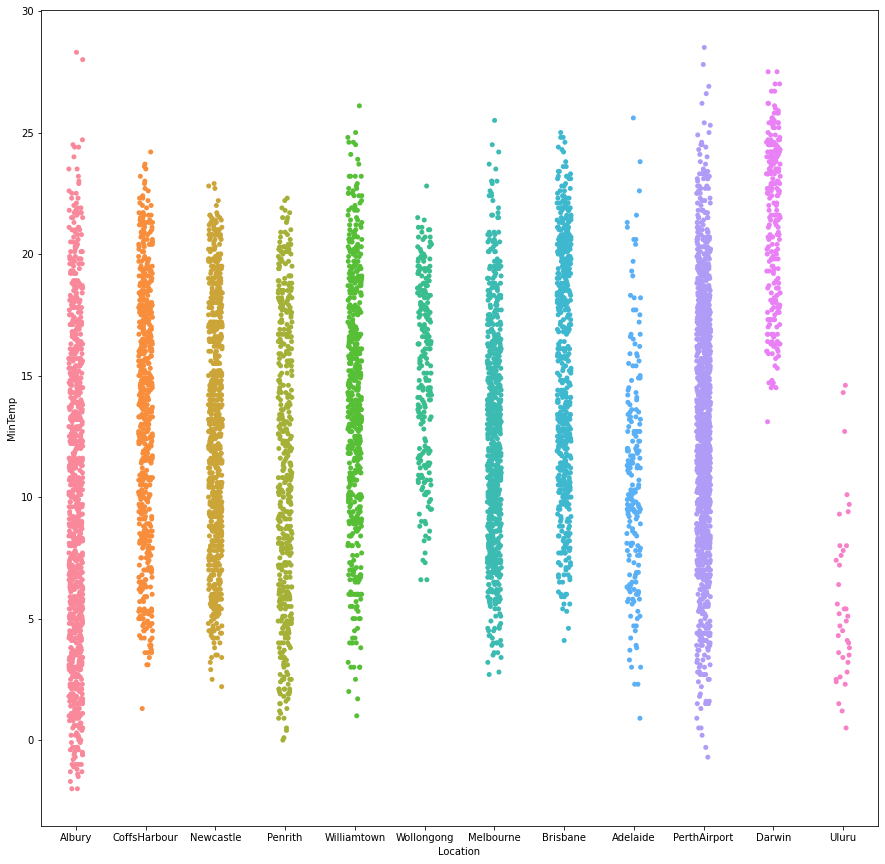

In [49]:
plt.figure(figsize=(15,15))
sns.stripplot(x='Location',y='MinTemp',data=df1)
plt.show()

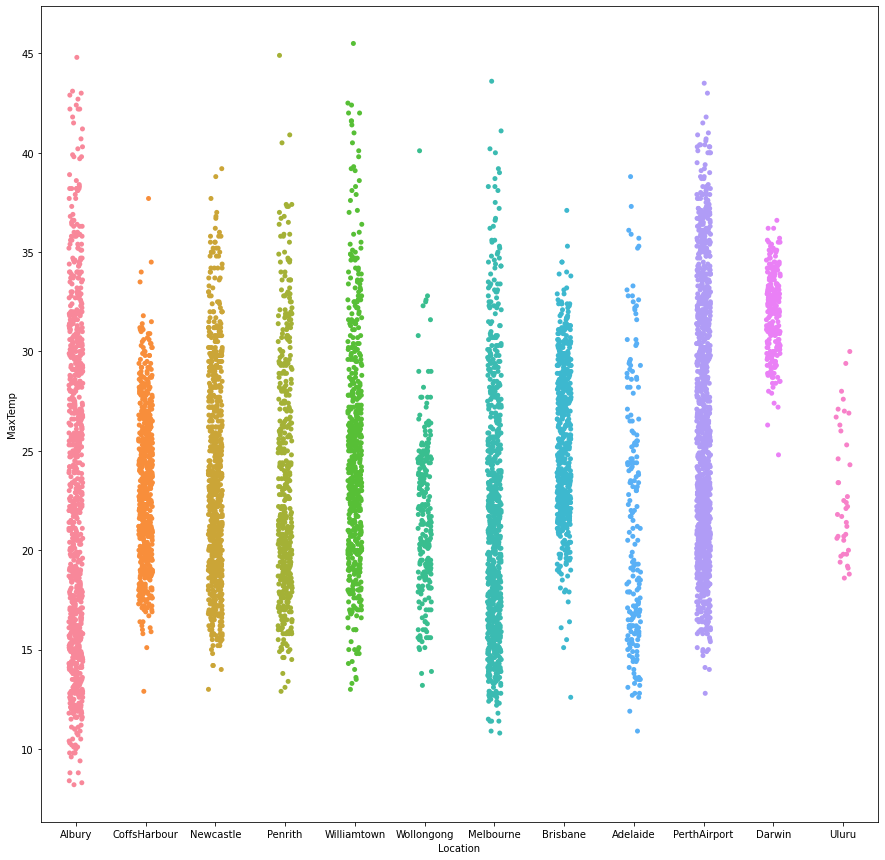

In [50]:
plt.figure(figsize=(15,15))
sns.stripplot(x='Location',y='MaxTemp',data=df1)
plt.show()

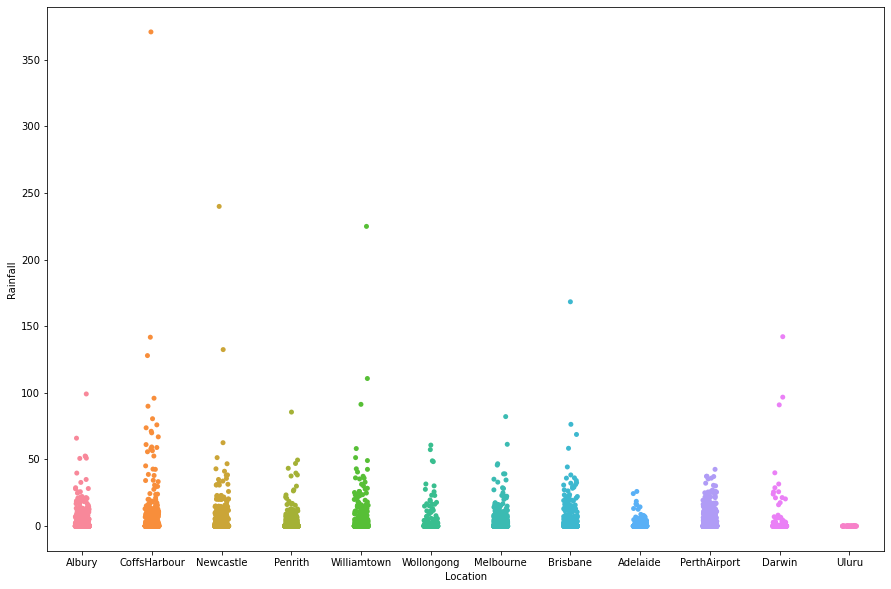

In [51]:
plt.figure(figsize=(15,10))
sns.stripplot(x='Location',y='Rainfall',data=df1)
plt.show()

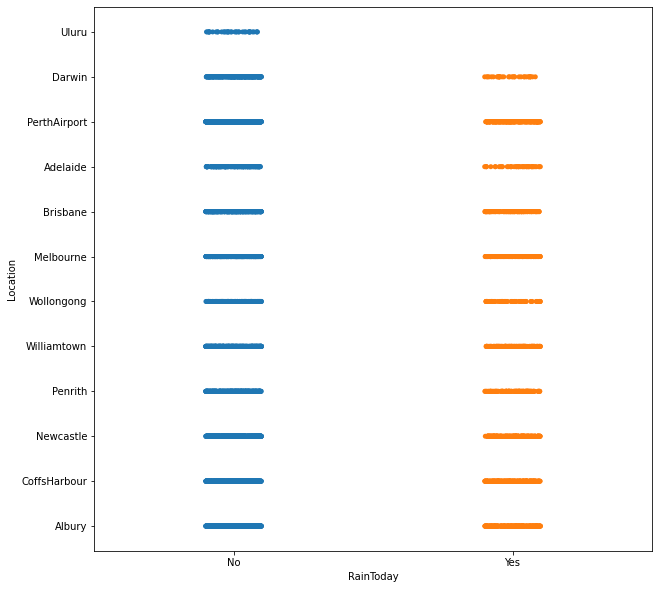

In [52]:
plt.figure(figsize=(10,10))
sns.stripplot(y='Location',x='RainToday',data=df1)
plt.show()

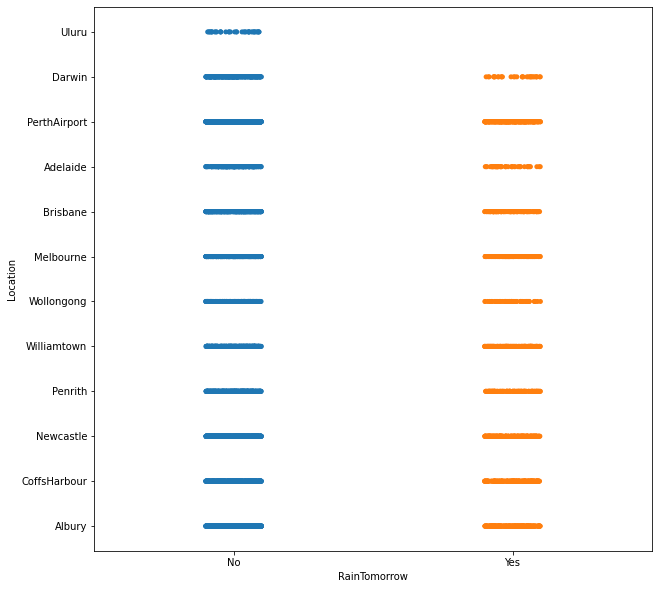

In [53]:
plt.figure(figsize=(10,10))
sns.stripplot(y='Location',x='RainTomorrow',data=df1)
plt.show()

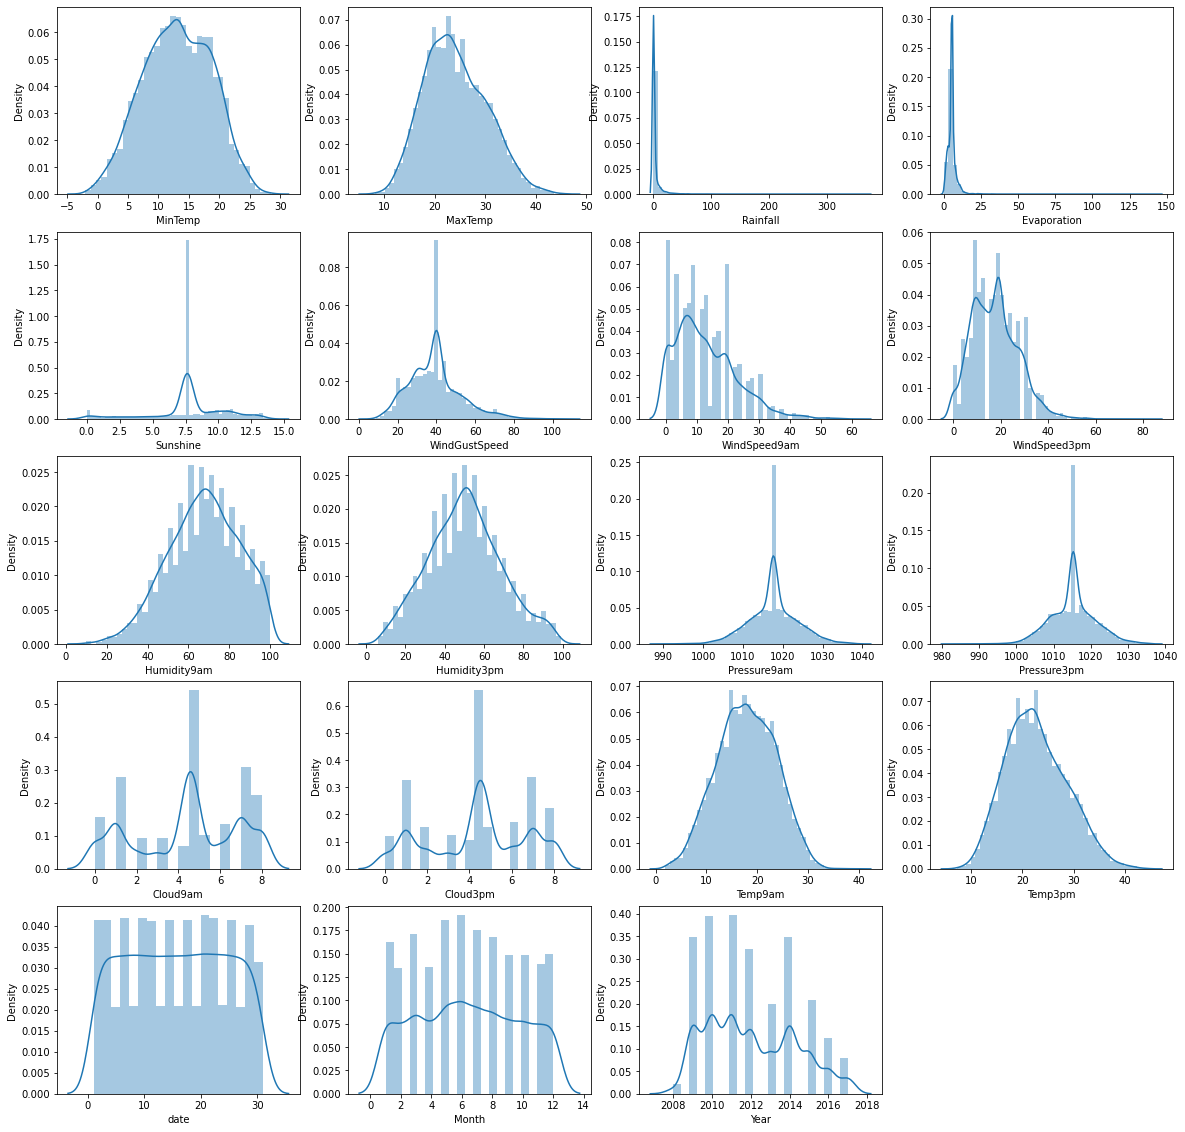

In [54]:

plt.figure(figsize=(20,20))
n=1
for i in numerical_cols:
    ax=plt.subplot(5,4,n)
    sns.distplot(x=df1[i])
    plt.xlabel(i)
    n+=1
    
    
plt.show()    

From the above graph we can observe skeweness in Rainfall, Evaporation, Sunshine,WindGustSpeed, Windspeed9am, Windspeed3pm, pressure9am, pressure3pm.

In [55]:
df1.skew()

MinTemp          -0.071901
MaxTemp           0.335493
Rainfall         13.652742
Evaporation      13.592081
Sunshine         -0.742376
WindGustSpeed     0.728402
WindSpeed9am      0.937683
WindSpeed3pm      0.553309
Humidity9am      -0.253713
Humidity3pm       0.149516
Pressure9am       0.021279
Pressure3pm       0.033484
Cloud9am         -0.279953
Cloud3pm         -0.222358
Temp9am          -0.043486
Temp3pm           0.354477
date              0.003374
Month             0.025363
Year              0.357394
dtype: float64

In [56]:
df1['Rainfall']=np.cbrt(df1['Rainfall'])
df1['Rainfall']=np.cbrt(df1['Rainfall'])
df1['Rainfall']=np.cbrt(df1['Rainfall'])
df1['Rainfall']=np.cbrt(df1['Rainfall'])

df1['Evaporation']=np.cbrt(df1['Evaporation'])

df1['WindGustSpeed']=np.cbrt(df1['WindGustSpeed'])

df1['WindSpeed9am']=np.sqrt(df1['WindSpeed9am'])

df1.skew()

MinTemp         -0.071901
MaxTemp          0.335493
Rainfall         0.621617
Evaporation     -0.057833
Sunshine        -0.742376
WindGustSpeed   -0.074518
WindSpeed9am    -0.380780
WindSpeed3pm     0.553309
Humidity9am     -0.253713
Humidity3pm      0.149516
Pressure9am      0.021279
Pressure3pm      0.033484
Cloud9am        -0.279953
Cloud3pm        -0.222358
Temp9am         -0.043486
Temp3pm          0.354477
date             0.003374
Month            0.025363
Year             0.357394
dtype: float64

For Sunshine feature if we are using transformation techniques, skewness value is becoming extremely low. For Rainfall feature, after applying transformation techniques skeweness values is not reduced. 

So, continuing further process with this data.

Let's try to find outliers in the dataset.

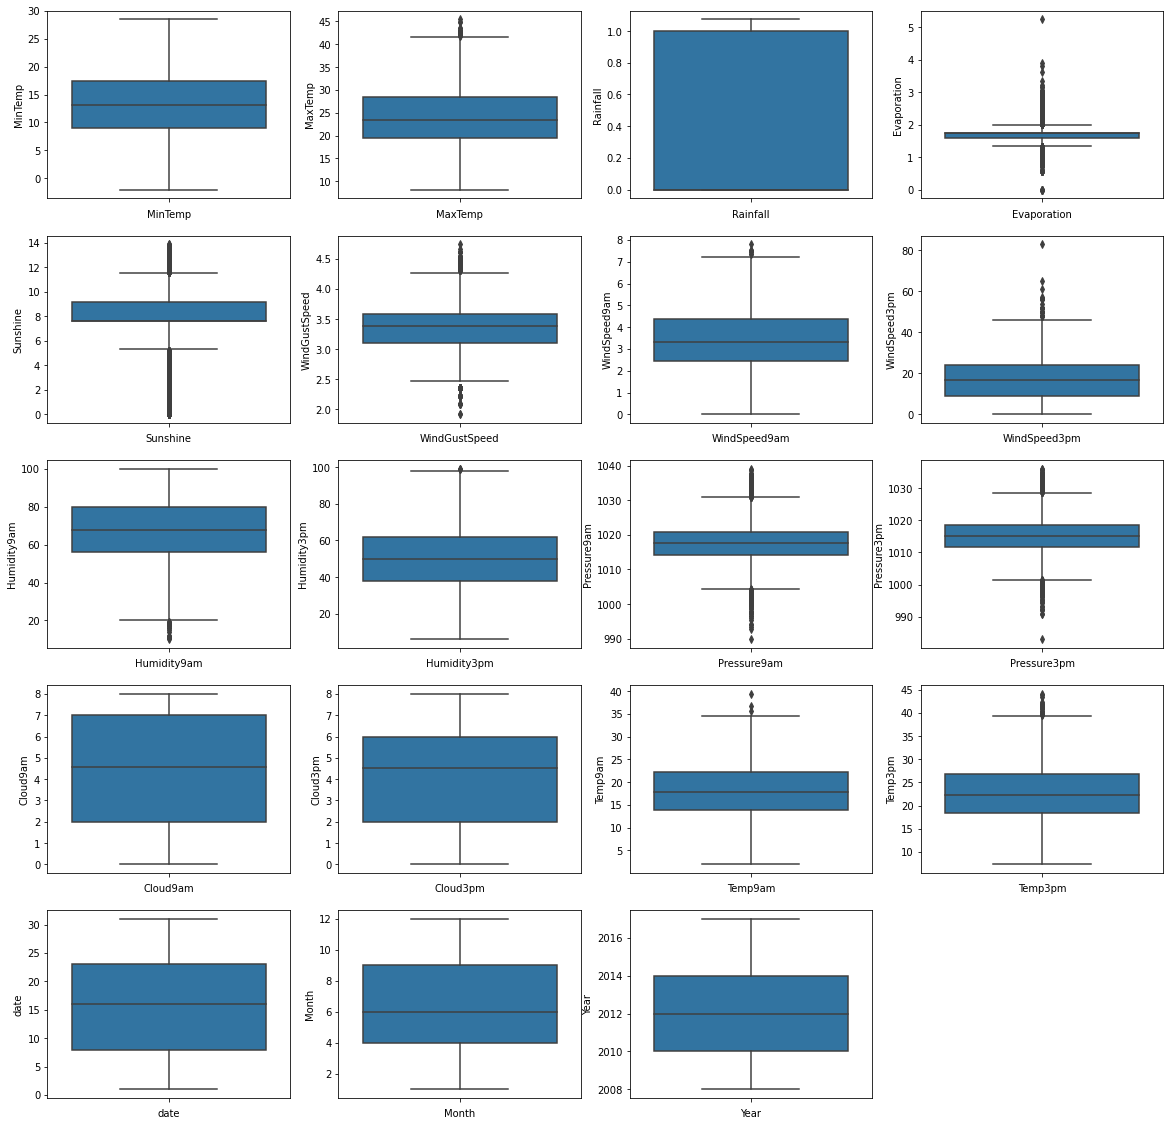

In [57]:

plt.figure(figsize=(20,20))
n=1
for i in numerical_cols:
    ax=plt.subplot(5,4,n)
    sns.boxplot(y=df1[i])
    plt.xlabel(i)
    n+=1
    
    
plt.show()    

From the above we can observe outliers are present in 'MaxTemp', 'Evaporation', 'Sunshine','WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9m', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm'  features.

In [58]:
from scipy.stats import zscore

cols=['MaxTemp', 'Evaporation', 'Sunshine','WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']

zscore=np.abs(zscore(df1[cols]))

df2=df1[(zscore<3).all(axis=1)]

df2.shape

(6415, 25)

In [59]:
df1.shape

(6624, 25)

Let's encode Categorical features.

In [60]:
for i in categorical_cols:
    print(i)
    print(df[i].unique())
    print('----------------------------')

Location
['Albury' 'CoffsHarbour' 'Newcastle' 'Penrith' 'Williamtown' 'Wollongong'
 'Melbourne' 'Brisbane' 'Adelaide' 'PerthAirport' 'Darwin' 'Uluru']
----------------------------
WindGustDir
['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' 'ENE' 'SSE' 'S' 'NW' 'SE' 'ESE'
 'E' 'SSW']
----------------------------
WindDir9am
['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' 'N' 'SSW' 'WSW' 'ESE' 'E' 'NW'
 'WNW' 'NNE']
----------------------------
WindDir3pm
['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' 'NE']
----------------------------
RainToday
['No' 'Yes']
----------------------------
RainTomorrow
['No' 'Yes']
----------------------------


In [61]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
for i in categorical_cols:
    df2[i]=LE.fit_transform(df2[i])
    
df2.head()    

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,date,Month,Year
0,1,13.4,22.9,0.993713,1.753261,7.632205,13,3.530348,13,14,...,1007.1,8.000000,4.503183,16.9,21.8,0,0,1,12,2008
1,1,7.4,25.1,0.000000,1.753261,7.632205,14,3.530348,6,15,...,1007.8,4.566622,4.503183,17.2,24.3,0,0,2,12,2008
2,1,12.9,25.7,0.000000,1.753261,7.632205,15,3.583048,13,15,...,1008.7,4.566622,2.000000,21.0,23.2,0,0,3,12,2008
3,1,9.2,28.0,0.000000,1.753261,7.632205,4,2.884499,9,0,...,1012.8,4.566622,4.503183,18.1,26.5,0,0,4,12,2008
4,1,17.5,32.3,1.000000,1.753261,7.632205,13,3.448217,1,7,...,1006.0,7.000000,8.000000,17.8,29.7,0,0,5,12,2008


Let's see the correlation among features and labels.

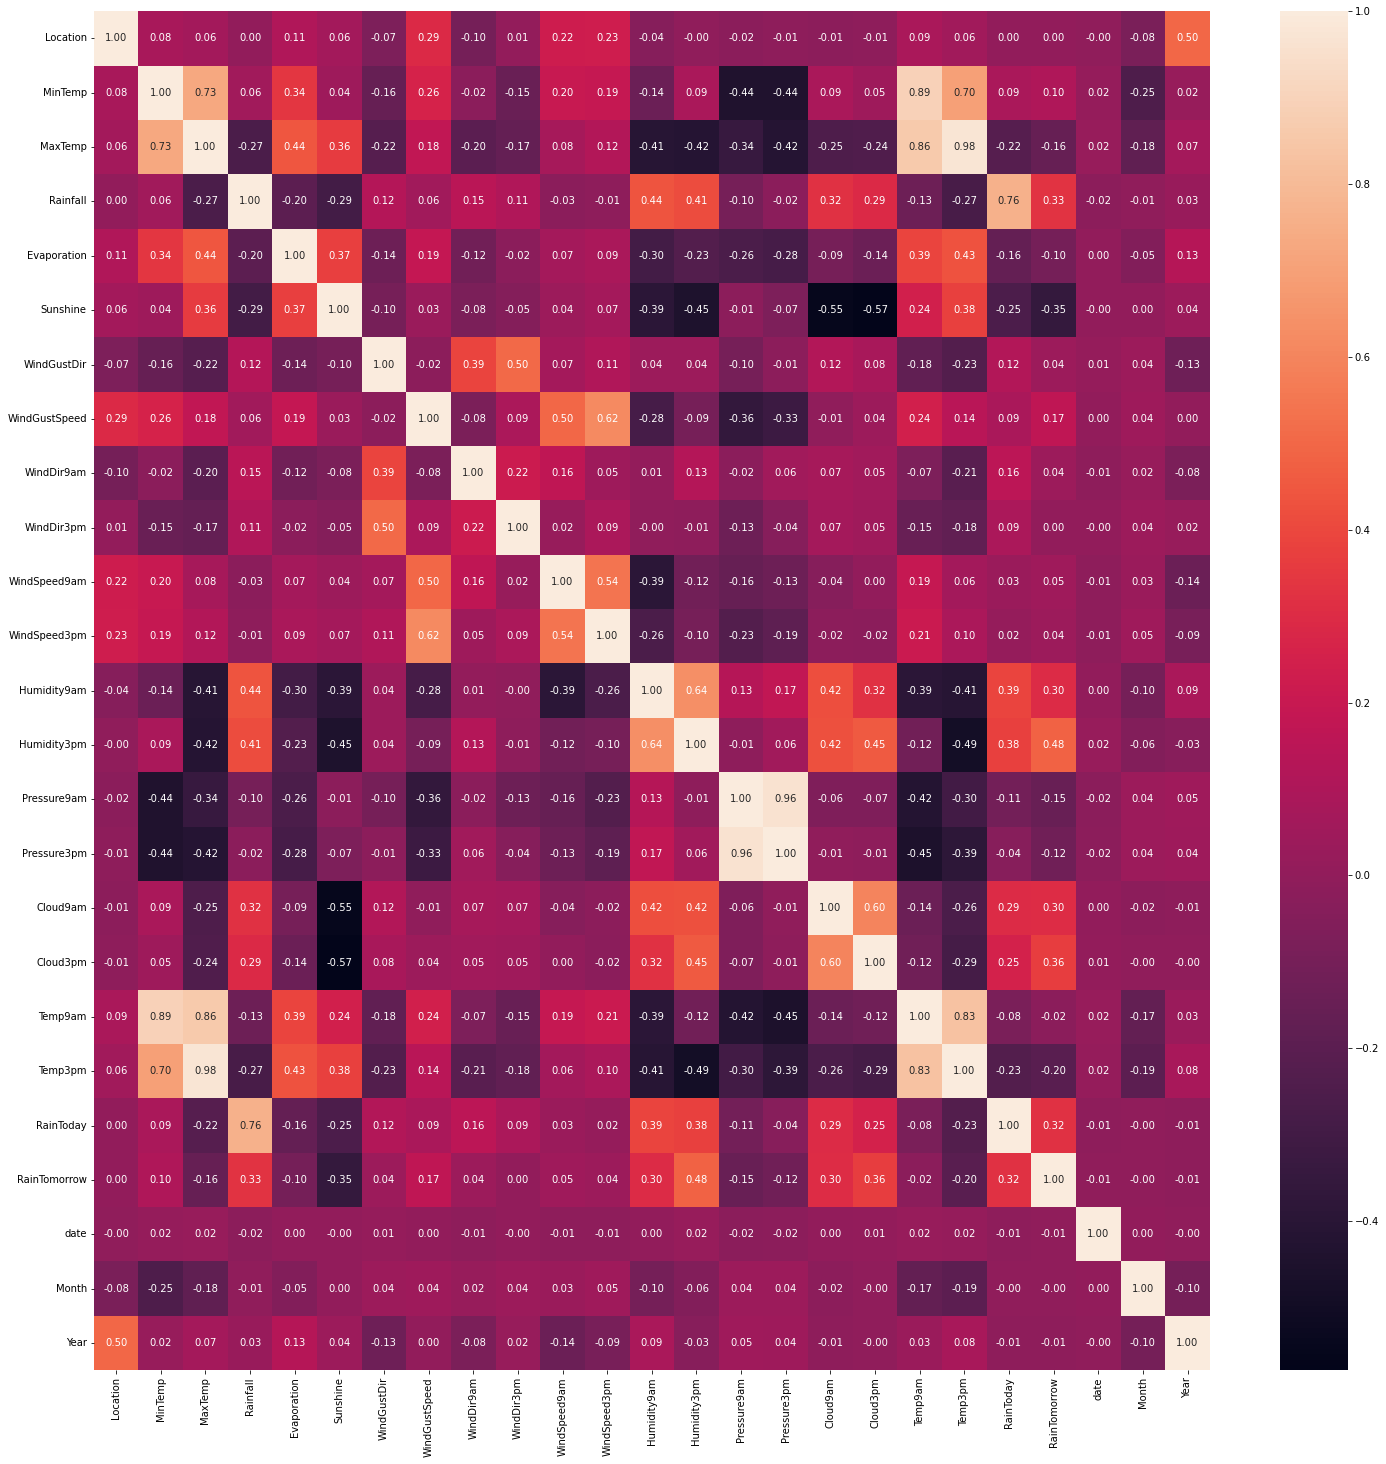

In [62]:
plt.figure(figsize=(25,25))
sns.heatmap(df2.corr(),annot=True,fmt='.2f')
plt.show()

From the above we can observe MinTeamp,MaxTemp are highly correlated with Teamp3pm,Temp9am.

Temp 9am is highly correlated with Temp3pm.

Pressure9am is higly correlated with pressure3pm.

MaxTemp is highly correlated with minTemp.

Before dropping higly correlated features, lets check vif value also.

In [63]:
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

x=df2.drop('RainTomorrow',axis=1)
y=df2['RainTomorrow']

scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [64]:
Vif=pd.DataFrame()
Vif['Features']=x.columns
Vif['vif value']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
Vif

,Features,vif value
0,Location,1.638221
1,MinTemp,9.209633
2,MaxTemp,26.649324
3,Rainfall,2.671113
4,Evaporation,1.529325
5,Sunshine,2.045908
6,WindGustDir,1.640225
7,WindGustSpeed,2.170407
8,WindDir9am,1.379321
9,WindDir3pm,1.489639


As per my analysis from heatmap and vif value let's drop 'MaxTemp', 'Pressure9am', 'Temp3pm' features.

In [65]:
x.drop(columns=['MaxTemp', 'Pressure9am', 'Temp3pm'],axis=1,inplace=True)
x_scaled=scaler.fit_transform(x)

In [66]:
Vif=pd.DataFrame()
Vif['Features']=x.columns
Vif['vif value']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
Vif

,Features,vif value
0,Location,1.634125
1,MinTemp,9.058585
2,Rainfall,2.649916
3,Evaporation,1.490537
4,Sunshine,2.038458
5,WindGustDir,1.617168
6,WindGustSpeed,2.141989
7,WindDir9am,1.327274
8,WindDir3pm,1.421039
9,WindSpeed9am,1.947699


VIF value of MinTemp and Temp9am are high. Let's drop 'Temp9am' beacuse MinTemp feature is highly correlated with target feature than Tempam.

In [67]:
x.drop(columns=['Temp9am'],axis=1,inplace=True)
x_scaled=scaler.fit_transform(x)

In [68]:
Vif=pd.DataFrame()
Vif['Features']=x.columns
Vif['vif value']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
Vif

,Features,vif value
0,Location,1.631866
1,MinTemp,1.678997
2,Rainfall,2.634211
3,Evaporation,1.487298
4,Sunshine,1.985753
5,WindGustDir,1.616950
6,WindGustSpeed,2.101638
7,WindDir9am,1.319601
8,WindDir3pm,1.419950
9,WindSpeed9am,1.890372


In [69]:
y.value_counts()

0    4904
1    1511
Name: RainTomorrow, dtype: int64

From the above we can observe there is class imbalance problem.

In [70]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x,y=SM.fit_resample(x,y)
y.value_counts()

0    4904
1    4904
Name: RainTomorrow, dtype: int64

In [71]:
x_scaled=scaler.fit_transform(x)

Let's find best Random State.

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [73]:
max_acc=0
max_rand_state=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=i)
    RFC=RandomForestClassifier()
    RFC.fit(x_train,y_train)
    y_predict=RFC.predict(x_test)
    acc_score=accuracy_score(y_test,y_predict)
    if(acc_score>max_acc):
        max_acc=acc_score
        max_rand_state=i
        
print("Best Random State - ",max_rand_state," Accuracy score - ",max_acc)        

Best Random State -  52  Accuracy score -  0.9135399673735726


In [74]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=52)

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier,RandomForestClassifier,ExtraTreesClassifier

In [76]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
y_predict_LR=LR.predict(x_test)
acc_score_LR=accuracy_score(y_test,y_predict_LR)
print("Accuracy Score ",acc_score_LR)

Accuracy Score  0.7895595432300163


In [77]:
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)
y_predict_DTC=DTC.predict(x_test)
acc_score_DTC=accuracy_score(y_test,y_predict_DTC)
print("Accuracy Score ",acc_score_DTC)

Accuracy Score  0.8274877650897227


In [78]:
Knn=KNeighborsClassifier()
Knn.fit(x_train,y_train)
y_predict_Knn=Knn.predict(x_test)
acc_score_Knn=accuracy_score(y_test,y_predict_Knn)
print("Accuracy Score ",acc_score_Knn)

Accuracy Score  0.8348287112561175


In [79]:
ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
y_predict_ABC=ABC.predict(x_test)
acc_score_ABC=accuracy_score(y_test,y_predict_ABC)
print("Accuracy Score ",acc_score_ABC)

Accuracy Score  0.8466557911908646


In [80]:
GDT=GradientBoostingClassifier()
GDT.fit(x_train,y_train)
y_predict_GDT=GDT.predict(x_test)
acc_score_GDT=accuracy_score(y_test,y_predict_GDT)
print("Accuracy Score ",acc_score_GDT)

Accuracy Score  0.8715334420880914


In [81]:
BC=BaggingClassifier()
BC.fit(x_train,y_train)
y_predict_BC=BC.predict(x_test)
acc_score_BC=accuracy_score(y_test,y_predict_BC)
print('Accuracy Score ',acc_score_BC)

Accuracy Score  0.8780587275693311


In [82]:
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
y_predict_RFC=RFC.predict(x_test)
acc_score_RFC=accuracy_score(y_test,y_predict_RFC)
print("accuracy score :",acc_score_RFC)

accuracy score : 0.9049755301794453


In [83]:
ETC=ExtraTreesClassifier()
ETC.fit(x_train,y_train)
y_predict_ETC=ETC.predict(x_test)
acc_score_ETC=accuracy_score(y_test,y_predict_ETC)
print("Accuracy Score ",acc_score_ETC)

Accuracy Score  0.91721044045677


From the above we can observe ExtraTreesClassifier exhibits highest accuracyscore of 91%. Let's consider this model as best model for the dataset.

Let's check accuracy score provided by the model is due to overfitting of the model.

In [84]:
from sklearn.model_selection import cross_val_score

In [85]:
score=cross_val_score(LR,x,y)
mean=score.mean()
print('Difference is ', acc_score_LR-mean)

Difference is  0.08012438537872546


In [86]:
score=cross_val_score(RFC,x,y)
mean=score.mean()
print("Difference is ",acc_score_RFC-mean)

Difference is  0.1953217878097604


In [87]:
score=cross_val_score(Knn,x,y)
mean=score.mean()
print("Difference is ",acc_score_Knn-mean)

Difference is  0.06727772596235915


In [88]:
score=cross_val_score(DTC,x,y)
mean=score.mean()
print("Difference is ",acc_score_DTC-mean)

Difference is  0.1653478512447717


In [89]:
score=cross_val_score(ETC,x,y)
mean=score.mean()
print("Difference is ",acc_score_ETC-mean)

Difference is  0.19950036410033745


In [90]:
score=cross_val_score(GDT,x,y)
mean=score.mean()
print("Difference is ",acc_score_GDT-mean)

Difference is  0.22377540189453093


In [91]:
score=cross_val_score(ABC,x,y)
mean=score.mean()
print("Difference is ",acc_score_ABC-mean)

Difference is  0.19563197873378235


In [93]:
score=cross_val_score(BC,x,y)
mean=score.mean()
print("Difference is ",acc_score_BC-mean)

Difference is  0.19154718573495733


From the above we can observe KNeighborsClassifier has less cross validation score when compared to other model.

Let's consider KNeighborsClassifier as best model for the dataset.

Let's generate classification report and confusion matrix.

In [94]:
from sklearn.metrics import classification_report,confusion_matrix

In [95]:
print("confusion_matrix\n",confusion_matrix(y_test,y_predict_Knn))

confusion_matrix
 [[ 916  323]
 [  82 1131]]


In [96]:
print("classification report \n",classification_report(y_test,y_predict_Knn))

classification report 
               precision    recall  f1-score   support

           0       0.92      0.74      0.82      1239
           1       0.78      0.93      0.85      1213

    accuracy                           0.83      2452
   macro avg       0.85      0.84      0.83      2452
weighted avg       0.85      0.83      0.83      2452



Let's tune parameters and increase performance of the model.

In [97]:
from sklearn.model_selection import GridSearchCV

In [98]:
param={'n_neighbors':[4,5,6],
      'weights':['uniform','distance'],
      'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
      'leaf_size':[30,36,40]}        

In [99]:
GSV=GridSearchCV(Knn,param_grid=param,n_jobs=-1)
GSV.fit(x_train,y_train)
GSV.best_params_

{'algorithm': 'auto', 'leaf_size': 30, 'n_neighbors': 4, 'weights': 'distance'}

In [100]:
Best_model=KNeighborsClassifier(algorithm='auto',leaf_size=30,n_neighbors=4,weights='distance')
Best_model.fit(x_train,y_train)
y_predict=Best_model.predict(x_test)
score=accuracy_score(y_test,y_predict)
print('Accuracy score - ',score)

Accuracy score -  0.865415986949429


After tuning parameters accuracy score increased to 86.5%.

Let's generate ROC curve.

In [101]:
from sklearn.metrics import roc_curve,roc_auc_score

In [102]:
fpr,tpr,treshold=roc_curve(y_test,y_predict)

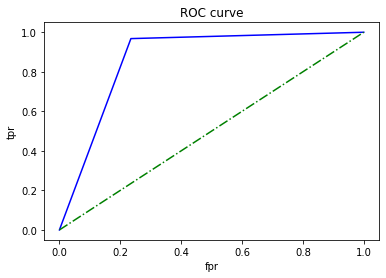

In [104]:
plt.plot(fpr,tpr,color='blue')
plt.plot([0,1],[0,1],color='green',linestyle='-.')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [106]:
print('Area under the curve ',roc_auc_score(y_test,y_predict))

Area under the curve  0.8664907409440504


In [107]:
import pickle

pickle.dump('Best_model',open('Rainfall_Forecasting_Classification','wb'))

# Task - 2 (Predicting amount of rainfall)

In [380]:
df3=pd.DataFrame(data=df)

In [381]:
df3.isnull().sum()

Location           0
MinTemp            0
MaxTemp            0
Rainfall         240
Evaporation        0
Sunshine           0
WindGustDir        0
WindGustSpeed      0
WindDir9am         0
WindDir3pm         0
WindSpeed9am       0
WindSpeed3pm       0
Humidity9am        0
Humidity3pm        0
Pressure9am        0
Pressure3pm        0
Cloud9am           0
Cloud3pm           0
Temp9am            0
Temp3pm            0
RainToday          0
RainTomorrow     239
date               0
Month              0
Year               0
dtype: int64

In [382]:
df3['RainTomorrow']=df3['RainTomorrow'].fillna(df3['RainTomorrow'].mode()[0])

In [383]:
df3['Rainfall'].isnull().sum()

240

Since target feature should not contain null vaules, let's drop these records.

In [384]:
df3.dropna(axis=0,inplace=True)

In [385]:
df3.duplicated().sum()

1561

In [386]:
df3.drop_duplicates().sum()
df3.shape

(8185, 25)

In [388]:
df3.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
date             0
Month            0
Year             0
dtype: int64

In [389]:
numerical_cols=[]
categorical_cols=[]

for i in df3.columns:
    if(df3[i].dtypes=='object'):
        categorical_cols.append(i)
        
    else:
        numerical_cols.append(i)

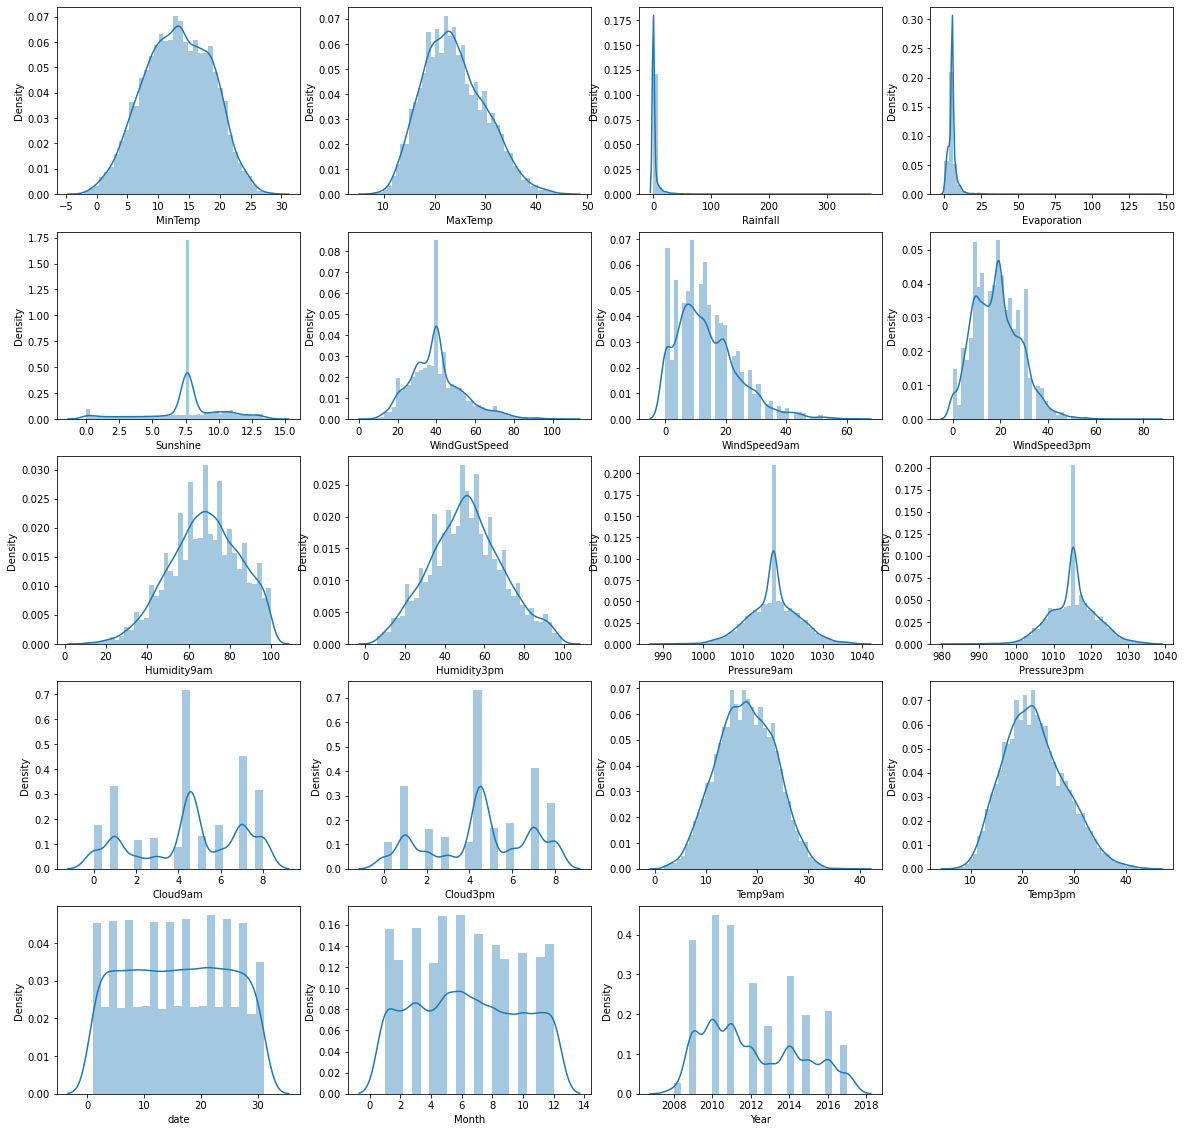

In [390]:

plt.figure(figsize=(20,20))
n=1
for i in numerical_cols:
    ax=plt.subplot(5,4,n)
    sns.distplot(x=df3[i])
    plt.xlabel(i)
    n+=1
    
    
plt.show()    

From the above we can observe skeweness in features 'Evaporation' ,'Sunshine' , 'WindGustSpeed' , 'WindSpeed9am' , 'WindSpeed3pm' , 'Humidity9am' , 'Pressure9am' , 'Pressure3pm'.

In [391]:
df3.skew()

MinTemp          -0.078355
MaxTemp           0.382814
Rainfall         13.028837
Evaporation      14.040083
Sunshine         -0.713721
WindGustSpeed     0.760105
WindSpeed9am      0.969930
WindSpeed3pm      0.504814
Humidity9am      -0.251521
Humidity3pm       0.121220
Pressure9am      -0.021061
Pressure3pm      -0.000087
Cloud9am         -0.359170
Cloud3pm         -0.274986
Temp9am          -0.012591
Temp3pm           0.395255
date              0.000970
Month             0.049817
Year              0.425323
dtype: float64

In [392]:

df3['Evaporation']=np.cbrt(df3['Evaporation'])

df3['WindGustSpeed']=np.cbrt(df3['WindGustSpeed'])

df3['WindSpeed9am']=np.sqrt(df3['WindSpeed9am'])

df3.skew()

MinTemp          -0.078355
MaxTemp           0.382814
Rainfall         13.028837
Evaporation       0.214512
Sunshine         -0.713721
WindGustSpeed    -0.017990
WindSpeed9am     -0.398813
WindSpeed3pm      0.504814
Humidity9am      -0.251521
Humidity3pm       0.121220
Pressure9am      -0.021061
Pressure3pm      -0.000087
Cloud9am         -0.359170
Cloud3pm         -0.274986
Temp9am          -0.012591
Temp3pm           0.395255
date              0.000970
Month             0.049817
Year              0.425323
dtype: float64

For Sunshine skewness value is increasing if transformation techniques are applied. Let's continue further processing.

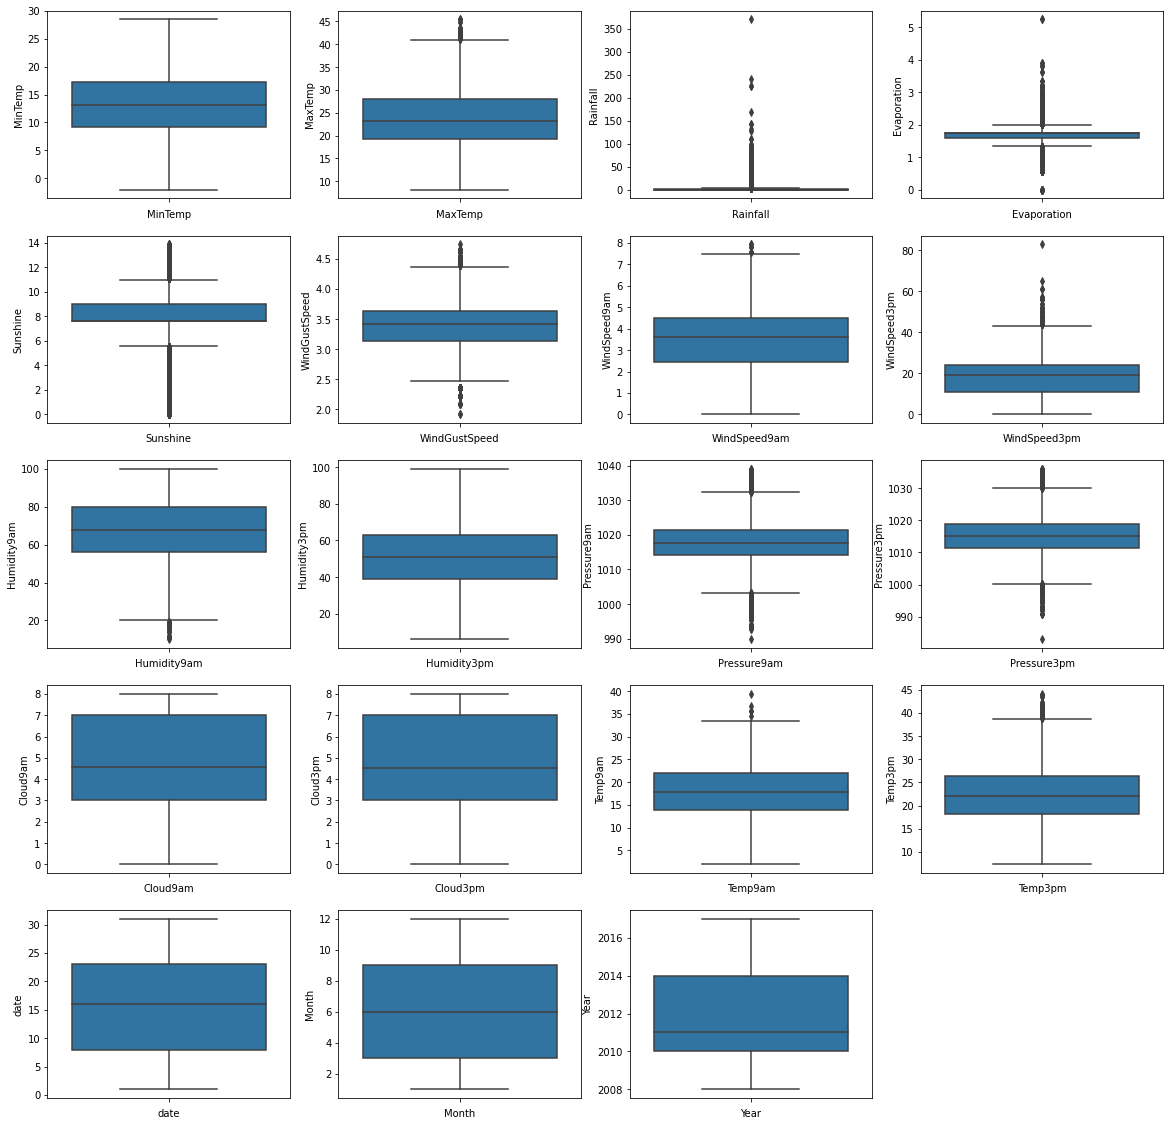

In [393]:

plt.figure(figsize=(20,20))
n=1
for i in numerical_cols:
    ax=plt.subplot(5,4,n)
    sns.boxplot(y=df3[i])
    plt.xlabel(i)
    n+=1
    
    
plt.show()    

From the above we can observe outliers in features, 'MaxTemp', 'Evaporation','Sunshine','WindGustDir','WindGustSpeed','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am','Pressure9am', 'Pressure3pm', 'Temp9am','Temp3pm',

As per my observation from above graph, target feature 'Rainfall' having so may outliers. Since target variable shouldn't be transformed , I have constructed without removing outliers. Performace of my model is very low.

So, I have thought of removing outliers from the target feature and try further model building.

In [394]:
from scipy.stats import zscore

cols=['MaxTemp', 'Evaporation', 'Rainfall','Sunshine','WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']

zscore=np.abs(zscore(df3[cols]))

df4=df3[(zscore<3).all(axis=1)]


In [397]:
df4.shape

(7787, 25)

Let's encode categorical features in the dataset.

In [398]:
for i in categorical_cols:
    print(i)
    print(df4[i].unique())
    print('------------------------------')

Location
['Albury' 'CoffsHarbour' 'Newcastle' 'Penrith' 'Williamtown' 'Wollongong'
 'Melbourne' 'Brisbane' 'Adelaide' 'PerthAirport' 'Darwin' 'Uluru']
------------------------------
WindGustDir
['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' 'ENE' 'SSE' 'S' 'SE' 'NW' 'E'
 'SSW' 'ESE']
------------------------------
WindDir9am
['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' 'SSW' 'N' 'WSW' 'ESE' 'E' 'NW'
 'WNW' 'NNE']
------------------------------
WindDir3pm
['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'SSW' 'SW' 'NNW' 'SE' 'N' 'S'
 'NNE' 'NE']
------------------------------
RainToday
['No' 'Yes']
------------------------------
RainTomorrow
['No' 'Yes']
------------------------------


In [399]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

for i in categorical_cols:
    df4[i]=LE.fit_transform(df4[i])
    
df4.head()    

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,date,Month,Year
0,1,13.4,22.9,0.6,1.753261,7.632205,13,3.530348,13,14,...,1007.1,8.000000,4.503183,16.9,21.8,0,0,1,12,2008
1,1,7.4,25.1,0.0,1.753261,7.632205,14,3.530348,6,15,...,1007.8,4.566622,4.503183,17.2,24.3,0,0,2,12,2008
2,1,12.9,25.7,0.0,1.753261,7.632205,15,3.583048,13,15,...,1008.7,4.566622,2.000000,21.0,23.2,0,0,3,12,2008
3,1,9.2,28.0,0.0,1.753261,7.632205,4,2.884499,9,0,...,1012.8,4.566622,4.503183,18.1,26.5,0,0,4,12,2008
4,1,17.5,32.3,1.0,1.753261,7.632205,13,3.448217,1,7,...,1006.0,7.000000,8.000000,17.8,29.7,0,0,5,12,2008


In [400]:
for i in categorical_cols:
    print(i)
    print(df4[i].unique())
    print('------------------------------')

Location
[ 1  3  6  7 10 11  5  2  0  8  4  9]
------------------------------
WindGustDir
[13 14 15  4  6  3  5 12  1 10  8  9  7  0 11  2]
------------------------------
WindDir9am
[13  6  9  1 12 10  8  4 11  3 15  2  0  7 14  5]
------------------------------
WindDir3pm
[14 15  0  7 13 10  2  1 11 12  6  9  3  8  5  4]
------------------------------
RainToday
[0 1]
------------------------------
RainTomorrow
[0 1]
------------------------------


Let's check correlation among feature and labels.

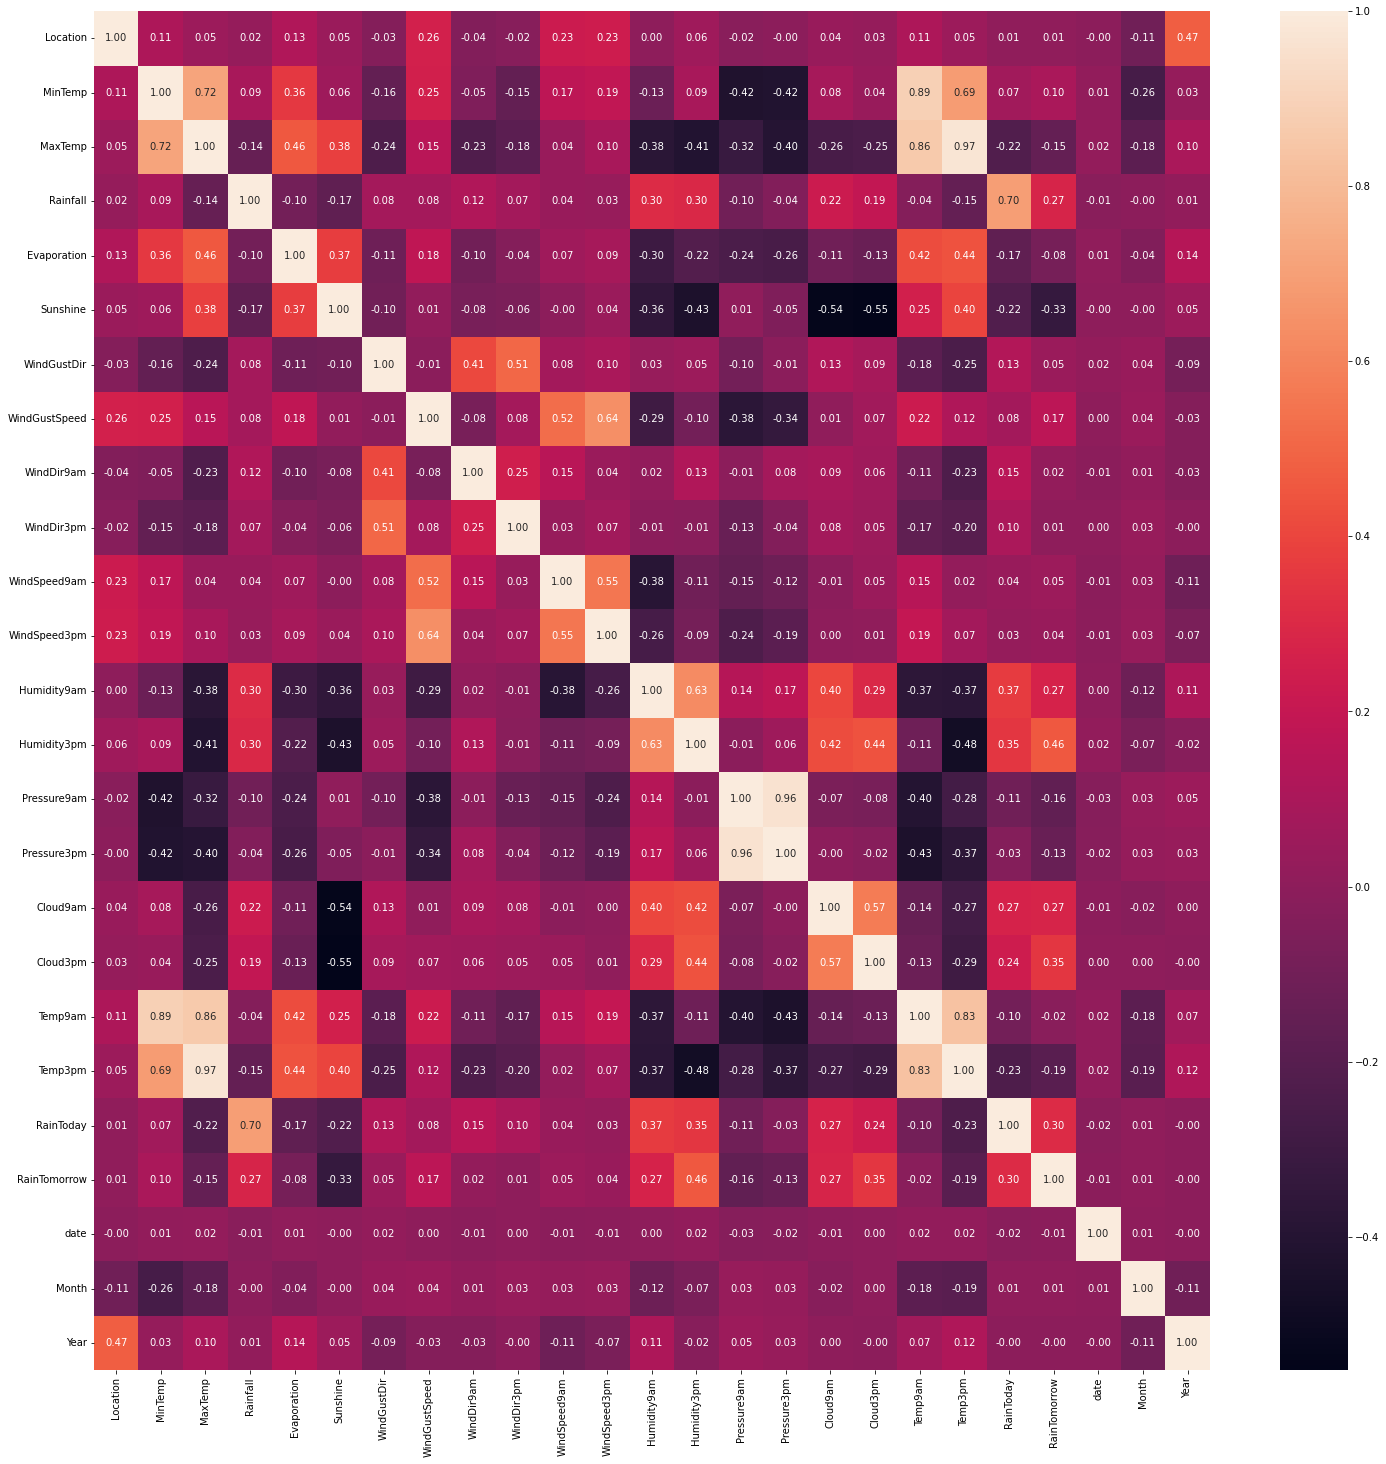

In [401]:
plt.figure(figsize=(25,25))
sns.heatmap(df4.corr(),annot=True,fmt='.2f')
plt.show()

From the above we can observe MinTeamp,MaxTemp are highly correlated with Teamp3pm,Temp9am.

Temp 9am is highly correlated with Temp3pm.

Pressure9am is higly correlated with pressure3pm.

MaxTemp is highly correlated with minTemp.

Before dropping features lets check vif value also.

In [402]:
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

x=df4.drop('Rainfall',axis=1)
y=df4['Rainfall']

scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [403]:
Vif=pd.DataFrame()
Vif['Features']=x.columns
Vif['vif value']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
Vif

,Features,vif value
0,Location,1.587252
1,MinTemp,8.820443
2,MaxTemp,25.473186
3,Evaporation,1.527549
4,Sunshine,2.008976
5,WindGustDir,1.622276
6,WindGustSpeed,2.358547
7,WindDir9am,1.390426
8,WindDir3pm,1.495190
9,WindSpeed9am,1.959748


As per my analysis from heatmap and vif value let's drop MaxTemp ,Pressure9am ,Temp3pm.

In [404]:
x.drop(['MaxTemp','Pressure9am','Temp3pm'],axis=1,inplace=True)
x_scaled=scaler.fit_transform(x)

In [405]:
Vif=pd.DataFrame()
Vif['Features']=x.columns
Vif['vif value']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
Vif

,Features,vif value
0,Location,1.584556
1,MinTemp,8.658435
2,Evaporation,1.491962
3,Sunshine,1.989749
4,WindGustDir,1.600813
5,WindGustSpeed,2.318186
6,WindDir9am,1.342183
7,WindDir3pm,1.418566
8,WindSpeed9am,1.945958
9,WindSpeed3pm,1.994570


Since Vif value of Temp9am is not in range let's drop this feature.

In [406]:
x.drop('Temp9am',axis=1,inplace=True)
x_scaled=scaler.fit_transform(x)

In [407]:
Vif=pd.DataFrame()
Vif['Features']=x.columns
Vif['vif value']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
Vif

,Features,vif value
0,Location,1.584145
1,MinTemp,1.665564
2,Evaporation,1.491785
3,Sunshine,1.940845
4,WindGustDir,1.600382
5,WindGustSpeed,2.263619
6,WindDir9am,1.328962
7,WindDir3pm,1.415762
8,WindSpeed9am,1.895650
9,WindSpeed3pm,1.967073


Let's find best Random State.

In [408]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [409]:
max_rvalue=0
max_randstate=0
for i in range(1,250):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=i)
    LR=LinearRegression()
    LR.fit(x_train,y_train)
    y_predict=LR.predict(x_test)
    r_value=r2_score(y_test,y_predict)
    if(r_value>max_rvalue):
        max_rvalue=r_value
        max_randstate=i
        
    
print('Best random state : ',max_randstate) 
print('r2 score :',max_rvalue)

Best random state :  17
r2 score : 0.533378982445325


In [410]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=17)

In [429]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor,ExtraTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor

In [412]:
LR=LinearRegression()
LR.fit(x_train,y_train)
y_predict_LR=LR.predict(x_test)
r_value_LR=r2_score(y_test,y_predict_LR)
print("R2 score - ",r_value_LR)

R2 score -  0.533378982445325


In [413]:
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
y_predict_DTR=DTR.predict(x_test)
r_value_DTR=r2_score(y_test,y_predict_DTR)
print("R2 score - ",r_value_DTR)

R2 score -  0.34560305385886936


In [414]:
KNR=KNeighborsRegressor()
KNR.fit(x_train,y_train)
y_predict_KNR=KNR.predict(x_test)
r_value_KNR=r2_score(y_test,y_predict_KNR)
print('R2 score - ',r_value_KNR)

R2 score -  0.4835953233492819


In [415]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
y_predict_RFR=RFR.predict(x_test)
r_value_RFR=r2_score(y_test,y_predict_RFR)
print('R2 score - ',r_value_RFR)

R2 score -  0.6425064214396985


In [416]:
L=Lasso()
L.fit(x_train,y_train)
y_predict_L=L.predict(x_test)
r_value_L=r2_score(y_test,y_predict_L)
print('R2 score - ',r_value_L)

R2 score -  0.4837828567693203


In [417]:
R=Ridge()
R.fit(x_train,y_train)
y_predict_R=R.predict(x_test)
r_value_R=r2_score(y_test,y_predict_R)
print('R2 score - ',r_value_R)

R2 score -  0.533381125182133


In [430]:
ETR=ExtraTreeRegressor()
ETR.fit(x_train,y_train)
y_predict_ETR=ETR.predict(x_test)
r_value_ETR=r2_score(y_test,y_predict_ETR)
print('R2 score ',r_value_ETR)

R2 score  0.24964173099123854


From the above we can observe RandomForestRegressor exhibits highest R2 score of 61%. 
Since, there are more number of outliers in target feature performance of the model is too low.
Let's check r2 score provided by the model is due to over fittingg of the model.


In [418]:
from sklearn.model_selection import cross_val_score

In [419]:
score=cross_val_score(LR,x,y)
print("cross validation score is ", r_value_LR-score.mean())

cross validation score is  0.043480243803055874


In [420]:
score=cross_val_score(DTR,x,y)
print("Difference is ",r_value_DTR-score.mean())

Difference is  0.09776414508354303


In [421]:
score=cross_val_score(KNR,x,y)
print("Difference is ",r_value_KNR-score.mean())

Difference is  0.40909214521549203


In [422]:
score=cross_val_score(L,x,y)
print("Difference is ",r_value_L-score.mean())

Difference is  0.2860960076809311


In [423]:
score=cross_val_score(R,x,y)
print("Difference is ",r_value_R-score.mean())

Difference is  0.04348605359391239


In [424]:
score=cross_val_score(RFR,x,y)
print("Difference is ",r_value_RFR-score.mean())

Difference is  0.07626808286700393


In [431]:
score=cross_val_score(ETR,x,y)
print("Difference is ",r_value_ETR-score.mean())

Difference is  0.16106311648898242


From the above we can observe LinearRegression has less cross validation score when compared to other model.

Let's consider this as best model and generate MSE,MAE.

In [432]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [433]:
print("R2 score ",r_value_LR)
print("Mean Absolute Error ",mean_absolute_error(y_test,y_predict_LR))
print("Mean Squared Error ",mean_squared_error(y_test,y_predict_LR))
print("Root mean squared error ",np.sqrt(mean_squared_error(y_test,y_predict_LR)))

R2 score  0.533378982445325
Mean Absolute Error  1.4628973671438623
Mean Squared Error  9.689025830738252
Root mean squared error  3.1127200051945327


Let's tune parameters and try to increase R2 score of the model.

In [434]:
from sklearn.model_selection import GridSearchCV

In [435]:
param_grid={'copy_X':['True','False'],
           'fit_intercept':['True','False'],
           }

In [436]:
GSV=GridSearchCV(LR,param_grid=param_grid,n_jobs=-1)
GSV.fit(x_train,y_train)
GSV.best_params_

{'copy_X': 'True', 'fit_intercept': 'True'}

In [437]:
Best_model=LinearRegression(fit_intercept=True,copy_X=True)
Best_model.fit(x_train,y_train)
y_predict=Best_model.predict(x_test)
r_value=r2_score(y_test,y_predict)
print("R2 score : ",r_value)

R2 score :  0.533378982445325


After tuning parameters , r2 score is not increased. Let's consider default parameters only.

In [438]:
print("R2 score ",r_value)
print("Mean Absolute Error ",mean_absolute_error(y_test,y_predict))
print("Mean Squared Error ",mean_squared_error(y_test,y_predict))
print("Root mean squared error ",np.sqrt(mean_squared_error(y_test,y_predict)))

R2 score  0.533378982445325
Mean Absolute Error  1.4628973671438623
Mean Squared Error  9.689025830738252
Root mean squared error  3.1127200051945327


In [439]:
import pickle
pickle.dump('Best_model',open('Rainfall_forecasting_Regression','wb'))